# Пользовательские настройки Matplotlib: конфигурации и таблицы стилей

Пользователи часто жалуются на настройки графиков по умолчанию в библиотеке Matplotlib. Хотя в выпуске 2.0 библиотеки Matplotlib многое должно измениться, умение настраивать значения по умолчанию поможет вам привести этот пакет в соответствие с вашими собственными эстетическими предпочтениями.

Здесь мы рассмотрим некоторые параметры конфигурации среды (rc) библиотеки Matplotlib и новую возможность — таблицы стилей (stylesheets), содержащие неплохие наборы конфигураций по умолчанию.

## Выполнение пользовательских настроек графиков вручную

Ранее в этой главе мы видели, что можно менять отдельные настройки графиков, получая в итоге нечто более приятное глазу, чем настройки по умолчанию. Эти настройки можно выполнять и для каждого графика отдельно. Например, вот довольно скучная гистограмма по умолчанию:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline

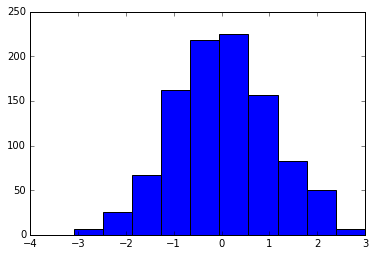

In [3]:
x = np.random.randn(1000)
plt.hist(x);

Мы можем настроить ее вид вручную, превратив эту гистограмму в намного более приятный глазу график:

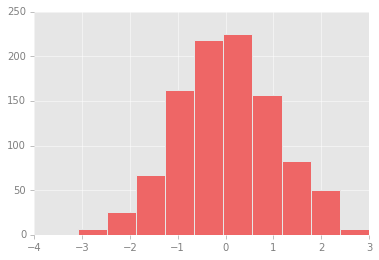

In [5]:
# Используем серый фон
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# Рисуем сплошные белые линии сетки
plt.grid(color='w', linestyle='solid')

# Скрываем основные линии осей координат
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Скрываем деления сверху и справа
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Осветляем цвет делений и меток
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# Задаем цвет заливки и границ гистограммы
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

Выглядит намного лучше, и можно заметить, что этот вид был вдохновлен пакетом визуализации ggplot языка R. Для таких настроек потребовалось немало труда и не хотелось бы снова проделывать их все при каждом создании графика. К счастью, существует способ задать эти настройки один раз для всех графиков.

## Изменяем значения по умолчанию: rcParams

Каждый раз при загрузке библиотеки Matplotlib она описывает конфигурацию среды (rc), содержащую стили по умолчанию для всех создаваемых вами элементов графиков. Эту конфигурацию можно настроить в любой момент, воспользовавшись удобной утилитой plt.rc. Рассмотрим, как можно модифицировать параметры rc таким образом, чтобы график по умолчанию выглядел схоже с вышеприведенным.

Начнем с сохранения копии текущего словаря rcParams, чтобы можно было без опасений восстановить эти значения в текущем сеансе:

In [6]:
IPython_default = plt.rcParams.copy()

Теперь можно воспользоваться функцией plt.rc и изменить некоторые из настроек:

In [8]:
from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Описав эти настройки, мы можем создать график и посмотреть на них в действии:

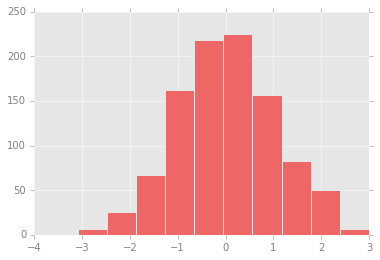

In [10]:
plt.hist(x);

Посмотрим, как выглядят с этими параметрами rc простые графики:

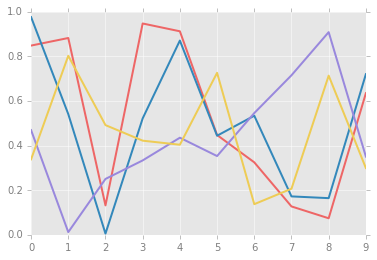

In [11]:
for i in range(4):
    plt.plot(np.random.rand(10))

Такие стили представляются мне гораздо более эстетически приятными, чем стили по умолчанию. Если мое чувство прекрасного расходится с вашим, то у меня есть для вас хорошая новость: вы можете настроить параметры rc под свой вкус! Эти настройки можно затем сохранить в файле .matplotlibrc, о котором можно прочитать в документации библиотеки Matplotlib. Но даже несмотря на это, я предпочитаю выполнять пользовательские настройки библиотеки Matplotlib с помощью ее таблиц стилей.

## Таблицы стилей

В выпущенной в августе 2014 года версии 1.4 библиотеки Matplotlib был добавлен удобный модуль style, включающий немало новых таблиц стилей по умолчанию, а также возможность создавать и компоновать пользовательские стили. Формат этих таблиц стилей аналогичен упомянутому выше файлу .matplotlibrc, но расширение имен их файлов должно быть .mplstyle.

Даже если вы и не хотите создать свой собственный стиль, включенные по умолчанию таблицы стилей очень удобны. Имеющиеся стили перечислены в plt.style.available — для краткости привожу только первые пять:

In [13]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']